## Import Libraries

In [1]:
import graphviz
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Model object

In [2]:

class Model:

    def __init__(self,interval=1):
        self._graph=None
        self._model=None
        self._questions= None
        self._empty_row = None
        self._data = None
        self._interval =interval ## setting the interval in which model will be updated
        self._counter =1

    
    def learn(self):
        raw_data = pd.read_csv("../resources/20Qgame.csv")
        data = pd.DataFrame(raw_data)
        self._data = data
        columns = list(data.keys())
        y = data.label
        x_columns = columns
        x_columns.remove('label')
        self._questions = x_columns
        
        self._empty_row = data.drop( data.index.to_list()[1:] ,axis = 0 )
        
        
        x = data[x_columns]
        clf = DecisionTreeClassifier()
        clf = clf.fit(x,y)
        dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x_columns,  
                                class_names=data.label,
                                filled=True)

        # Draw graph
        graph = graphviz.Source(dot_data, format="png") 
        
        self._graph=graph
        self._model=clf  
        
    ## accessors:
    
    def get_model(self):
        return self._model

    def get_graph(self):
        return self._graph
    
    def get_questions(self):
        return self._questions
    
    def get_empty_row(self):
        return self._empty_row
        
    ## predict function
    def predict(self,x):
        return self._model.predict(x)
    
    ## update to DataFrame and model function
    def update(self, row):
        print("adding to dataset.....")
        self._data = (self._data.set_index('label').append(row.set_index('label'))).reset_index()
        
        ## update the model only if the interval passed.
        if (self._counter== self._interval):
            self._counter = 1
            self._data.to_csv("../resources/20Qgame.csv", mode='w',index=False)
            self.learn()

## Help functions

### Input from user

In [3]:
def boolean_input(text):
    yes_list = ['yes','Yes','True','true','1']
    no_list = ['no','No','False','false','0']
    flag = None
    while(True):
        try:
            answer = input(text).lstrip().rstrip()
            if answer in yes_list:
                flag = 1
                break
            elif answer in no_list:
                flag = 0
                break
            else:
                print("please try again")
                raise ValueError('not a valid input ')
        except:
            pass
    return flag

### Check with the user if the prediction correct

In [4]:
def is_it(y):
    if boolean_input("Is it what you thought about?   ") == 1:
        return y
    else:
        res = input("So please enter what you thought about and I will insert that to my data-base:   ")
        return res.lstrip().rstrip()

### Ask user all the questions

In [5]:
def get_query(m):
    row = m.get_empty_row()
    row.reset_index()
    questions = m.get_questions()
    questions

    for q in questions:   
        flag = boolean_input(q+"   ")
        row.at[0,q] = flag
    return row   

## One game function

In [6]:
def one_game(m):
    print("\n\n_________________________________________________________________________________________________________\n\n")
    print("Lets start!\n")
    graph = m.get_graph()
    ## get new query
    row = get_query(m)
    ##print prediction
    x = row[m.get_questions()]
    y = m.predict(x)

    print("\nI'm in a learning process, so maybe I don't know yet the sport you thought about it.")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("you thought about:  "+ y[0])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

    ## check correctnesses
    checked_y = is_it(y)
    row.at[0,'label']=checked_y

    ##add to database
    if checked_y!=y:
        m.update(row)
    
    keep_play= boolean_input("Want to play onther round?   ")
    return keep_play

## Run function

In [7]:
def run(m):
    ## learn

    print("Hello!!\nIn this game you need to think about kind of sports, and I will guess it in about 10 questions")

    keep_play=1 
    while(keep_play==1):
        keep_play = one_game(m)
        m.get_graph()

## Model before playing

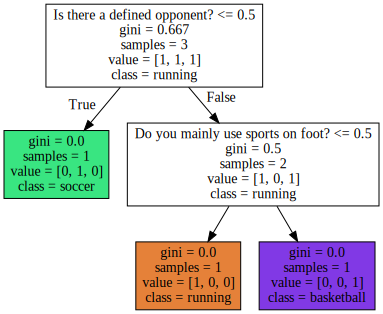

In [8]:
m = Model()
m.learn()
m.get_graph()

In [9]:
##   When the data base will be big enough,
##   I will show only the questions needed for give a prediction,
##   and asked them in increasing order by importance.

a = m._model.feature_importances_

# Main section

In [10]:
run(m)

Hello!!
In this game you need to think about kind of sports, and I will guess it in about 10 questions


_________________________________________________________________________________________________________


Lets start!

Is it necessarily a team sport?   no
Does take place on a court?   no
Is there a ball?   no
If there's a ball, is it bigger than an orange?   no
Is there an accessory for each player? (Excluding clothing)   yes
Is it a sport that most people know how to do?   no
Does it occur in water?   yes
Does wind affects much on the sports?   yes
Involve strenuous physical activity?   yes
Is there a defined opponent?   no
The duration of the game / sport is pre-set?   no
Is it in the air?   no
Do you mainly use sports on foot?   no

I'm in a learning process, so maybe I don't know yet the sport you thought about it.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
you thought about:  running
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is it what you thoug

## Model after playing

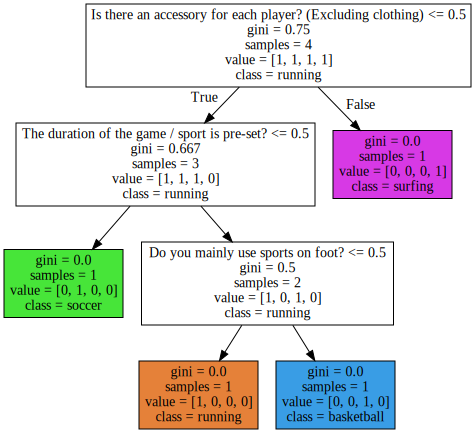

In [11]:
m.get_graph()